### Introduction
Xente is an e-payments, e-commerce, and financial services company in Uganda offering various products and services that can be paid for using Mobile Money (Airtel Money, MTN Mobile Money), Bank Card (Visa Card, Master Card), Xente wallet and on credit (Pay Later). Some of the products consumers can buy include airtime, data bundles, pay water and electricity bills, TV subscription services, buy event tickets, movie tickets, bus tickets, and more.

This is a past competition that was given as an assessment for the purpose of learning.


### Aims and Objectives
Fraud detection is an important application of machine learning in the financial services sector. The objective of this competition is to create a machine learning model to detect fraudulent transactions. This solution will help Xente provide improved and safer service to its customers.


### Reference
The dataset used is the property of Zindi and the competition was sponsored by Xente, Innovation Village, and insight2impact.


The Xente's dataset variable definitions.

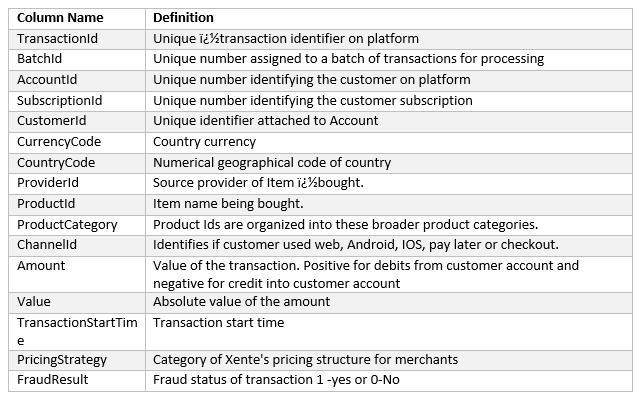

In [1]:
#import necessaty modules
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read data file
data = pd.read_csv('Xente_Variable_Definitions.csv')
data

,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account
5,CurrencyCode,Country currency
6,CountryCode,Numerical geographical code of country
7,ProviderId,Source provider of Item �bought.
8,ProductId,Item name being bought.
9,ProductCategory,ProductIds are organized into these broader pr...


In [3]:
#read train file
train = pd.read_csv('training.csv')
display(train)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0


In [4]:
#check info and shape of training file
train.info()
train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

(95662, 16)

In [5]:
#read test file, info and shape
test = pd.read_csv('test.csv')
test.info()
test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45019 entries, 0 to 45018
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         45019 non-null  object 
 1   BatchId               45019 non-null  object 
 2   AccountId             45019 non-null  object 
 3   SubscriptionId        45019 non-null  object 
 4   CustomerId            45019 non-null  object 
 5   CurrencyCode          45019 non-null  object 
 6   CountryCode           45019 non-null  int64  
 7   ProviderId            45019 non-null  object 
 8   ProductId             45019 non-null  object 
 9   ProductCategory       45019 non-null  object 
 10  ChannelId             45019 non-null  object 
 11  Amount                45019 non-null  float64
 12  Value                 45019 non-null  int64  
 13  TransactionStartTime  45019 non-null  object 
 14  PricingStrategy       45019 non-null  int64  
dtypes: float64(1), int6

(45019, 15)

In [6]:
#Inspect the time column for both files
train['TransactionStartTime'] = train['TransactionStartTime'].str.replace('T', ' ')
train['TransactionStartTime'] = train['TransactionStartTime'].str.replace('Z', '')

test['TransactionStartTime'] = test['TransactionStartTime'].str.replace('T', ' ')
test['TransactionStartTime'] = test['TransactionStartTime'].str.replace('Z', '')

In [7]:
train['TransactionStartTime'] = pd.to_datetime(train['TransactionStartTime'], infer_datetime_format=True) 

test['TransactionStartTime'] = pd.to_datetime(test['TransactionStartTime'], infer_datetime_format=True) 

In [8]:
#get the 'year', 'month', 'day', 'hour', 'min', 'secs', 'week' & 'weekday' columns for both files
train['Year'] = train['TransactionStartTime'].dt.year
train['Month'] = train['TransactionStartTime'].dt.month
train['Day'] = train['TransactionStartTime'].dt.day
train['Hour'] = train['TransactionStartTime'].dt.hour
train['Minute'] = train['TransactionStartTime'].dt.minute
train['Seconds'] = train['TransactionStartTime'].dt.second
train['week'] = train['TransactionStartTime'].dt.week
train['weekday'] = train['TransactionStartTime'].dt.weekday

test['Year'] = test['TransactionStartTime'].dt.year
test['Month'] = test['TransactionStartTime'].dt.month
test['Day'] = test['TransactionStartTime'].dt.day
test['Hour'] = test['TransactionStartTime'].dt.hour
test['Minute'] = test['TransactionStartTime'].dt.minute
test['Seconds'] = test['TransactionStartTime'].dt.second
test['week'] = test['TransactionStartTime'].dt.week
test['weekday'] = test['TransactionStartTime'].dt.weekday

In [9]:
#inspect the 'Amount' columns for both files
train.loc[train['Amount'] > 0, 'Debit'] = 1
train.loc[train['Amount'] < 0, 'Debit'] = 0
train['Debit'] = train['Debit'].astype('int')

test.loc[test['Amount'] > 0, 'Debit'] = 1
test.loc[test['Amount'] < 0, 'Debit'] = 0
test['Debit'] = test['Debit'].astype('int')

In [10]:
#Check for low- and high- cardinality categorical features
train.select_dtypes('object').nunique()

TransactionId      95662
BatchId            94809
AccountId           3633
SubscriptionId      3627
CustomerId          3742
CurrencyCode           1
ProviderId             6
ProductId             23
ProductCategory        9
ChannelId              4
dtype: int64

In [11]:
#neglect the columns of high and low cardinality, and select appropriate columns
cols = ['ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Value', 'Debit', 'FraudResult']
df = train[cols]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ProviderId       95662 non-null  object
 1   ProductId        95662 non-null  object
 2   ProductCategory  95662 non-null  object
 3   ChannelId        95662 non-null  object
 4   Value            95662 non-null  int64 
 5   Debit            95662 non-null  int32 
 6   FraudResult      95662 non-null  int64 
dtypes: int32(1), int64(2), object(4)
memory usage: 4.7+ MB


In [12]:
#a statistical description of the dataset
df.describe()

,Value,Debit,FraudResult
count,9.566200e+04,95662.000000,95662.000000
mean,9.900584e+03,0.600792,0.002018
std,1.231221e+05,0.489738,0.044872
min,2.000000e+00,0.000000,0.000000
25%,2.750000e+02,0.000000,0.000000
50%,1.000000e+03,1.000000,0.000000
75%,5.000000e+03,1.000000,0.000000
max,9.880000e+06,1.000000,1.000000


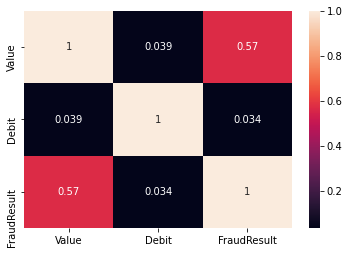

In [13]:
#check for the correlation of the numerical features with the target variable
corr = df.corr()
sns.heatmap(corr, annot=True);

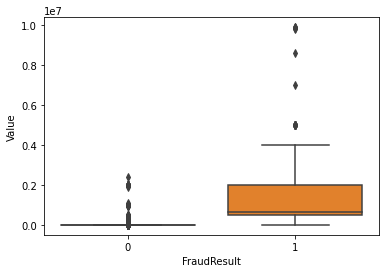

In [14]:
#feature- 'Value' box plot
sns.boxplot(x='FraudResult', y='Value', data=df);

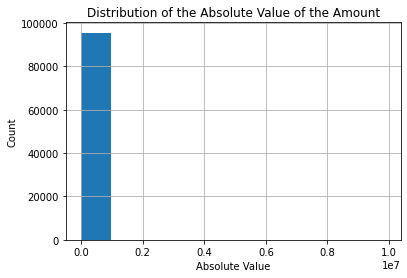

In [15]:
#feature- 'Value' histogram
df['Value'].hist()
plt.xlabel('Absolute Value')
plt.ylabel('Count')
plt.title('Distribution of the Absolute Value of the Amount');

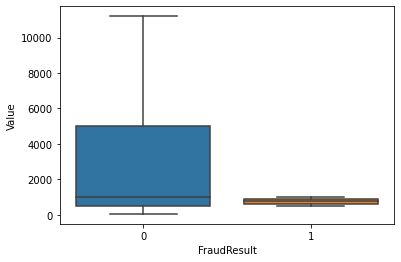

In [16]:
#clip feature- 'Value' beacuse of variations in the mean and median 
q1, q9 = df['Value'].quantile([0.1, 0.9])
mask = df['Value'].between(q1, q9)

#plot the clipped feature- 'Value'
sns.boxplot(x='FraudResult', y='Value', data = df[mask]);

In [17]:
new_df = df[mask]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78223 entries, 0 to 95661
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ProviderId       78223 non-null  object
 1   ProductId        78223 non-null  object
 2   ProductCategory  78223 non-null  object
 3   ChannelId        78223 non-null  object
 4   Value            78223 non-null  int64 
 5   Debit            78223 non-null  int32 
 6   FraudResult      78223 non-null  int64 
dtypes: int32(1), int64(2), object(4)
memory usage: 4.5+ MB


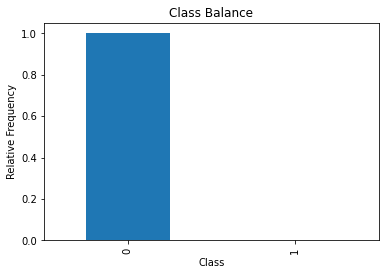

In [18]:
#plot the class balance barchart, i.e., values of 'FraudResult'
new_df['FraudResult'].value_counts(normalize=True).plot(kind='bar', xlabel = 'Class', ylabel = 'Relative Frequency',
                                                    title = 'Class Balance');

In [19]:
#get the minor- and major- class probabilities
major_class, minor_class = new_df['FraudResult'].value_counts(normalize=True)
print('The major class probability is %.2f' %major_class)
print('The minor class probability is %.2f' %minor_class)

The major class probability is 1.00
The minor class probability is 0.00


In [20]:
#get the features and target
target = 'FraudResult'
X = df.drop(columns = target)
y = df[target]

In [21]:
#check the shape of your X and y for compatibility before spitting
display(X.shape)
display(y.shape)

(95662, 6)

(95662,)

In [22]:
#split the X and y data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state=42)
display(X_train.shape)
display(y_train.shape)

(66963, 6)

(66963,)

In [23]:
#get the accuracy baseline
acc_baseline = y_train.value_counts(normalize=True).max()
print('The accuracy baseline is %.3f' %acc_baseline)

The accuracy baseline is 0.998


In [24]:
#instantiate your model
model = make_pipeline(OneHotEncoder(use_cat_names=True), LogisticRegression())
model

Pipeline(steps=[('onehotencoder', OneHotEncoder(use_cat_names=True)),
                ('logisticregression', LogisticRegression())])

In [25]:
#fit your model to the training sets
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['ProviderId', 'ProductId',
                                     'ProductCategory', 'ChannelId'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression())])

In [26]:
#evaluate model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print('The training score is %.3f' %acc_train)
print('The test score is %.3f' %acc_test)

The training score is 0.998
The test score is 0.998


In [27]:
#predict probability
y_train_pred_proba = model.predict_proba(X_train)
print('The prediction probability is ', y_train_pred_proba[:5])

The prediction probability is  [[9.98946752e-01 1.05324803e-03]
 [9.99754548e-01 2.45451544e-04]
 [9.99762437e-01 2.37562607e-04]
 [9.98946752e-01 1.05324803e-03]
 [9.99327991e-01 6.72008879e-04]]


In [28]:
#get features and importances
features = model.named_steps['onehotencoder'].get_feature_names()
importances = model.named_steps['logisticregression'].coef_[0]

odds_ratios = pd.Series(np.exp(importances), index=features).sort_values()

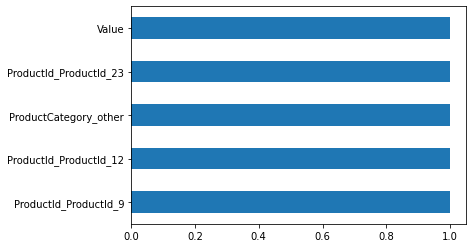

In [29]:
#plot 5 largest coefficients
odds_ratios.tail().plot(kind='barh');

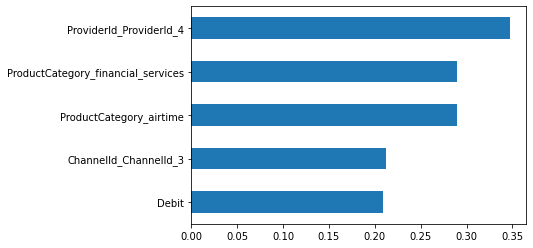

In [30]:
#plot 5 smallest coefficients
odds_ratios.head().plot(kind='barh');

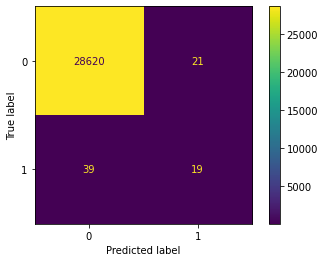

In [31]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [32]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28641
           1       0.47      0.33      0.39        58

    accuracy                           1.00     28699
   macro avg       0.74      0.66      0.69     28699
weighted avg       1.00      1.00      1.00     28699



### Summary and Conclusion
- The most detected fraud are in; product IDs 23, 12 and 9; product category- 'other'; and value sections.
- The least detected fraud are in; product ID 4; product category- 'financial services'; product ctegory- 'airtime'; channel ID 3 ; and debit sections.